In [1]:
import geopandas as gpd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# downloaded from https://data.biogeo.ucdavis.edu/data/gadm3.6/gpkg/gadm36_IND_gpkg.zip
data = gpd.read_file("./India.gpkg", driver='GPKG')

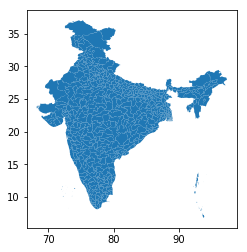

In [3]:
data.plot();plt.show();

In [6]:
col = data.columns.tolist()[0:30]
print col

[u'id', u'ST_NAME', u'PC_NAME', u'ST_CODE', u'PC_CODE', u'Res', 'geometry']


In [7]:
data;

In [6]:
data["PC_NAME"].unique()

array([u'Andaman & Nicobar Islands', u'Zahirabad', u'Araku', u'Khammam',
       u'Medak', u'Anakapalli', u'Bhongir', u'Chevella', u'Srikakulam',
       u'Eluru', u'Secunderabad', u'Peddapalle', u'Rajahmundry',
       u'Nalgonda', u'Narsapuram', u'Nagarkurnool', u'Amlapuram',
       u'Narasaraopet', u'Machilipatnam', u'Guntur', u'Ongole', u'Bapatla',
       u'Kurnool', u'Karimnagar', u'Nizamabad', u'Vizianagaram',
       u'Kakinada', u'Adilabad', u'Rajampet', u'Nellore', u'Anantapur',
       u'Kadapa', u'Nandyal', u'Mahabubabad', u'Chittoor', u'Tirupati',
       u'Hindupur', u'Mahbubnagar', u'Vijayawada', u'Visakhapatnam',
       u'Warangal', u'Hyderabad', u'Malkajgiri', u'Arunachal West',
       u'Arunachal East', u'Lakhimpur', u'Dibrugarh', u'Jorhat', u'Tezpur',
       u'Kaliabor', u'Mangaldoi', u'Nagaon', u'Autonomous District',
       u'Dhubri', u'Karimganj', u'Silchar', u'Kokrajhar', u'Guwahati',
       u'Barpeta', u'Muzaffarpur', u'Valmiki Nagar', u'Araria',
       u'Gopalganj', u

In [7]:
#Get West Bengal Coordinates 
#https://gis.stackexchange.com/questions/282681/filter-a-geopandas-dataframe-for-points-within-a-specific-country
wb = data.ix[data['ST_NAME']=='WB']

In [8]:
wb.plot()

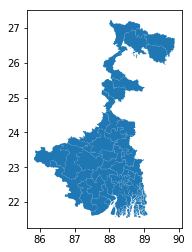

In [9]:
plt.show()

In [10]:
wb["PC_NAME"].unique()

array([u'Darjiling', u'Arambag', u'Barasat', u'Medinipur', u'Tamluk',
       u'Murshidabad', u'Krishnanagar', u'Birbhum', u'Bolpur',
       u'Barddhaman - Durgapur', u'Puruliya', u'Barddhaman Purba',
       u'Bankura', u'Asansol', u'Ranaghat', u'Bishnupur', u'Jangipur',
       u'Balurghat', u'Maldah Uttar', u'Kolkata Uttar', u'Jhargram',
       u'Kolkata Dakshin', u'Uluberiya', u'Mathurapur', u'Jaynagar',
       u'Diamond Harbour', u'Kanthi', u'Basirhat', u'Bangaon',
       u'Koch Bihar', u'Alipurduars', u'Jalpaiguri', u'Barakpur', u'Haora',
       u'Jadavpur', u'Hugli', u'Shrirampur', u'Baharampur',
       u'Maldah Dakshin', u'Raiganj', u'Ghatal', u'Dum Dum'], dtype=object)

In [11]:
nconst= wb.shape[0];print nconst #number of constituency


42


In [1]:
wb2 = wb.copy().sort_values("PC_CODE")
#this is a file made by a different program to match win predictions to consitituency mactched by PC_code
data_pred = pd.read_table("data_win_prediction_2019.csv",sep=",",skiprows=2,usecols=[1,2,3],names=["EC","EC_NUM","WIN_P"])
wpar=0
EC_reg_idx = data_pred["EC_NUM"].values #EC_NUM from analysis data
PC_reg_idx=wb2['PC_CODE'].values; #codes from Map data

win_party = np.random.randint(1,5,42)*0 # 1=BJP 2=TMC 3=INC 4=CPIM

for idx in xrange(1,43):
    #print idx
    loc1 = np.where(EC_reg_idx==idx) # location of PC_reg_idx in EC_reg_idx
    #print idx, data_pred['EC'][loc1[0]].values[0],data_pred['EC_NUM'][loc1[0]].values[0],
    wpar = data_pred['WIN_P'][loc1[0]].values[0]
    print wb2['PC_NAME'].values[idx-1],wpar
    if((wpar=="BJP")): 
        #print "BJP"
        win_party[idx-1]=1
    elif(wpar=="TMC"):
        win_party[idx-1]=2
    elif(wpar=="INC"):
        win_party[idx-1]=3
    elif(wpar=="CPIM"):
        win_party[idx-1]=4
    else:
        print "Party not found! Please check!"

#print win_party        

NameError: name 'wb' is not defined

In [13]:
wb2['PC_NAME'].values[0]

u'Koch Bihar'

In [22]:
data_pred

,EC,EC_NUM,WIN_P
0,Cooch Behar,1,BJP
1,Alipurduars,2,BJP
2,Jangipur,9,BJP
3,Murshidabad,11,BJP
4,Ranaghat,13,BJP
5,Bangaon,14,BJP
6,Barrackpur,15,BJP
7,Kolkata Uttar,24,BJP
8,Uluberia,26,BJP
9,Hooghly,28,BJP


In [14]:

color = ['k']*nconst
for i in xrange(nconst):
    if(win_party[i]==1):
        color[i]='orange'
    elif(win_party[i]==2):
        color[i] = 'greenyellow'
    elif(win_party[i]==3):
        color[i] = 'b'
    elif(win_party[i]==4):
        color[i] = 'r'   
    else:
        print "error, party not present"
        
wb2["W_IDX"] = win_party ;
wb2["W_COLOR"] = (win_party-1)/3.0 ;


In [15]:
wb2

,id,ST_NAME,PC_NAME,ST_CODE,PC_CODE,Res,geometry,W_IDX,W_COLOR
529,None,WB,Koch Bihar,S25,1,SC,(POLYGON ((89.12516839335029 26.52364307618833...,1,0.000000
530,None,WB,Alipurduars,S25,2,ST,"(POLYGON ((89.8618451882317 26.70255638227886,...",1,0.000000
531,None,WB,Jalpaiguri,S25,3,SC,"(POLYGON ((88.7011456285146 26.92388810131573,...",2,0.333333
500,None,WB,Darjiling,S25,4,GEN,"POLYGON ((88.75979678597572 27.14815971035878,...",2,0.333333
539,None,WB,Raiganj,S25,5,GEN,"POLYGON ((88.32116828542985 26.25065328989998,...",4,1.000000
517,None,WB,Balurghat,S25,6,GEN,"POLYGON ((88.04343109231627 25.54423971984302,...",2,0.333333
518,None,WB,Maldah Uttar,S25,7,GEN,"POLYGON ((88.16621055812983 24.94093229214575,...",2,0.333333
538,None,WB,Maldah Dakshin,S25,8,GEN,"POLYGON ((87.83895079237396 25.20153254197948,...",2,0.333333
516,None,WB,Jangipur,S25,9,GEN,"POLYGON ((87.91197947092479 24.60116500428839,...",1,0.000000
537,None,WB,Baharampur,S25,10,GEN,"POLYGON ((88.17511092832821 24.07366474032197,...",3,0.666667


In [16]:
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(
    'mycmap', [(0.0, 'orange'),(0.33,'greenyellow'),(0.66,'blue'),(1,'r')])

wb2.plot(column='W_COLOR',cmap = cmap,legend=True,alpha=0.6,edgecolor="black",linewidth='0.5');

custom_lines = [Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='greenyellow', lw=4),
                Line2D([0], [0], color='b', lw=4),
               Line2D([0], [0], color='r', lw=4)]

plt.legend(custom_lines, ['BJP', 'TMC', 'INC','CPIM'],loc=2)

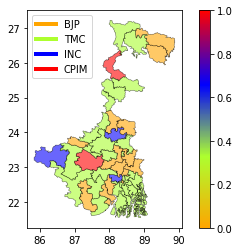

In [17]:
plt.savefig('WB_prediction2.pdf')
plt.show()

In [8]:
wb2;

NameError: name 'wb2' is not defined

In [19]:
for i in range(43):
    idx = wb['PC_CODE']==i
    print wb.ix[idx,2],"---",wb.ix[idx,4]


Series([], Name: PC_NAME, dtype: object) --- Series([], Name: PC_CODE, dtype: int64)
529    Koch Bihar
Name: PC_NAME, dtype: object --- 529    1
Name: PC_CODE, dtype: int64
530    Alipurduars
Name: PC_NAME, dtype: object --- 530    2
Name: PC_CODE, dtype: int64
531    Jalpaiguri
Name: PC_NAME, dtype: object --- 531    3
Name: PC_CODE, dtype: int64
500    Darjiling
Name: PC_NAME, dtype: object --- 500    4
Name: PC_CODE, dtype: int64
539    Raiganj
Name: PC_NAME, dtype: object --- 539    5
Name: PC_CODE, dtype: int64
517    Balurghat
Name: PC_NAME, dtype: object --- 517    6
Name: PC_CODE, dtype: int64
518    Maldah Uttar
Name: PC_NAME, dtype: object --- 518    7
Name: PC_CODE, dtype: int64
538    Maldah Dakshin
Name: PC_NAME, dtype: object --- 538    8
Name: PC_CODE, dtype: int64
516    Jangipur
Name: PC_NAME, dtype: object --- 516    9
Name: PC_CODE, dtype: int64
537    Baharampur
Name: PC_NAME, dtype: object --- 537    10
Name: PC_CODE, dtype: int64
505    Murshidabad
Name: PC_NAME, 

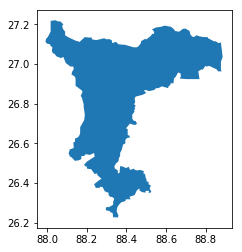